# Graph Theory: Simple and Shortest Paths

## Introduction
In graph theory, a path in a graph is a finite or infinite sequence of edges which connect a sequence of vertices which, by most definitions, are all distinct from one another. In a directed graph, a directed path (sometimes called dipath[1]) is again a sequence of edges (or arcs) which connect a sequence of vertices, but with the added restriction that the edges all be directed in the same direction.

## Objectives
You will be able to:
- Understand and explain simple paths and shortest paths
- Calculate simple and shortest paths for undirected, directed and weighted graphs
- Explain Dijkstra Algorithm and calculate the shortest path using this algorithm in networkx

## Simple and Shortest Paths
![](path.gif)


> __A simple path is a path with no repeated nodes.__

[See NetworkX documentation for simple paths](https://networkx.github.io/documentation/latest/reference/algorithms/simple_paths.html?highlight=simple%20path).

> __The shortest path between two nodes is a path with the minimum number of edges. The distance between any two nodes $u$ and $v$ of $G$, denoted $d_{G}(u,v)$, is the length of the shortest path between them.__ 

[See NetworkX documentation for shortest paths](https://networkx.github.io/documentation/latest/reference/algorithms/shortest_paths.html?highlight=shortest%20path)

NetworkX has high level functions for simple paths and shortest paths that accept directed, undirected and multigraphs and do the right thing. For instance, for directed graphs the paths have to follow the direction of the edges. We shall see how to calculate shortest paths for all different graphs in this lesson. 

## Undirected Graphs

NetworkX represents the paths as list of nodes, from that it's easy to get the edges that form the path. Let's create a simple undirected network in networkx. 

In [2]:
import networkx as nx
%matploltib inline

UsageError: Line magic function `%matploltib` not found.


/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

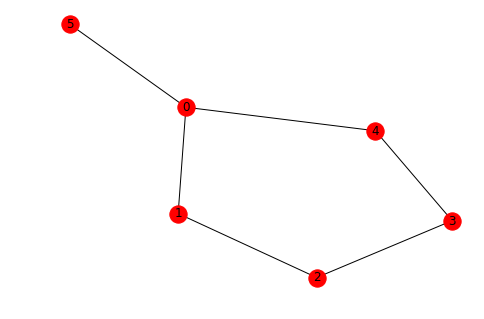

In [4]:
# Create a cycle graph and add an extra node
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

We can check if a path exists between different nodes of a graph.

In [5]:
nx.has_path(G, 5, 3)

True

Using `all_simple_paths()`, we can get . list of all possible simple paths from one node to another. 

In [6]:
list(nx.all_simple_paths(G, 0, 3))

[[0, 1, 2, 3], [0, 4, 3]]

The shortest path among all simple paths can be calculated as:

In [7]:
nx.shortest_path(G, 0, 3)

[0, 4, 3]

In [8]:
G.add_edge(1,5)

In [9]:
G.add_edge(5,4)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


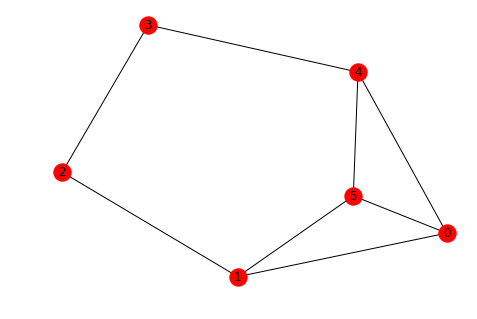

In [10]:
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)

In [14]:
help(nx)

Help on package networkx:

NAME
    networkx

DESCRIPTION
    NetworkX
    
    NetworkX is a Python package for the creation, manipulation,
    and study of the structure, dynamics, and functions
    of complex networks.
    
    Website (including documentation)::
    
        http://networkx.github.io
    
    Mailing list::
    
        https://groups.google.com/forum/#!forum/networkx-discuss
    
    Source::
    
        https://github.com/networkx/networkx
    
    Bug reports::
    
        https://github.com/networkx/networkx/issues
    
    Simple example
    --------------
    
    Find the shortest path between two nodes in an undirected graph::
    
        >>> import networkx as nx
        >>> G = nx.Graph()
        >>> G.add_edge('A', 'B', weight=4)
        >>> G.add_edge('B', 'D', weight=2)
        >>> G.add_edge('A', 'C', weight=3)
        >>> G.add_edge('C', 'D', weight=4)
        >>> nx.shortest_path(G, 'A', 'D', weight='weight')
        ['A', 'B', 'D']
    
    Bugs

We can calculate the total length of the shortest path, for undirected graphs, it is the number of hops. 

In [11]:
nx.shortest_path_length(G, 0, 3)

2

We can obtain the list of edges of a path from the list of nodes that NetworkX outputs as shown below:

In [80]:
path = nx.shortest_path(G, 5, 3)
path_edges = list(zip(path, path[1:]))
print("nodes in path: {}".format(path))
print("edges in path: {}".format(path_edges))

nodes in path: [5, 0, 4, 3]
edges in path: [(5, 0), (0, 4), (4, 3)]


 You can also compute all shortest paths from a single source node


In [60]:
nx.single_source_shortest_path(G, 0)

{0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 4, 3], 4: [0, 4], 5: [0, 5]}

Similarly, we can calculate the shortest paths between each possible pair of nodes in the network

In [81]:
list(nx.all_pairs_shortest_path(G))

[(0, {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 4, 3], 4: [0, 4], 5: [0, 5]}),
 (1, {0: [1, 0], 1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 0, 4], 5: [1, 0, 5]}),
 (2,
  {0: [2, 1, 0], 1: [2, 1], 2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 1, 0, 5]}),
 (3,
  {0: [3, 4, 0], 1: [3, 2, 1], 2: [3, 2], 3: [3], 4: [3, 4], 5: [3, 4, 0, 5]}),
 (4, {0: [4, 0], 1: [4, 0, 1], 2: [4, 3, 2], 3: [4, 3], 4: [4], 5: [4, 0, 5]}),
 (5,
  {0: [5, 0],
   1: [5, 0, 1],
   2: [5, 0, 1, 2],
   3: [5, 0, 4, 3],
   4: [5, 0, 4],
   5: [5]})]

## Directed Graphs
> __When edges of a graph have a specific direction showing a 'to-from' relationship, they are called directed graphs.__

Consider the example of Facebook and Twitter connections. When you add someone to your friend list on Facebook, you will also be added to their friend list. This is a two-way relationship and that connection graph will be a non-directed one. Whereas if you follow a person on Twitter, that person might not follow you back. This is a directed graph.

<img src="dir.png" width=500>

Here is how you would create a simple Directed graph in networkx. 

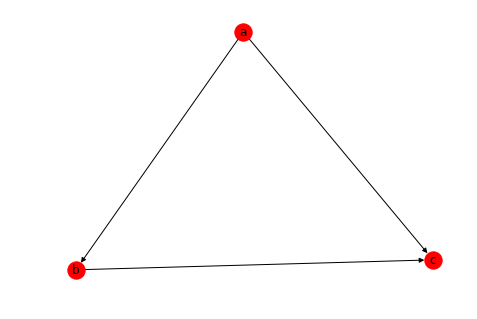

In [12]:
# Create a directed graph with DiGraph()
import networkx as nx
DG = nx.DiGraph()
DG.add_edge('a','b')
DG.add_edge('a','c')
DG.add_edge('b','c')
nx.draw(DG, with_labels=True)


In [14]:
DG.add_edge('b','d')

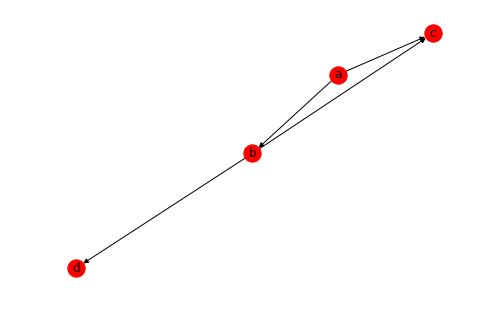

In [15]:
nx.draw(DG, with_labels=True)

Let's use a graph generator to create a directed graph and see how we can calculate the paths between nodes. 


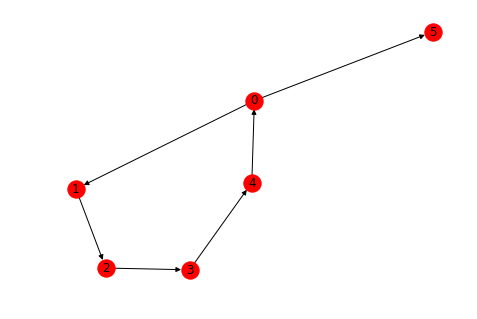

In [16]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)


For directed graphs, we usually calculate indegree and outdegree to process a node, here is how you would calculate it.

In [17]:
dict(D.in_degree()), dict(D.out_degree())

({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}, {0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0})

Similarly, we can calculate the successors and predecesors of nodes in a directed graph. This is again basedon the direction of the edge. 

In [18]:
list(D.successors(0)), list(D.predecessors(0))

([1, 5], [4])

### Calculating paths in a directed graph 

Let's see a few methods , as above , to see how path calculation changes from directed to undirected graphs. 


__Remember the paths in a directed graph always follow the direction of edges i.e. arrows. We can not go in the opposite direction while calculating a path.__


In [19]:
A = 0
B = 3
print('Path exists between nodes:', nx.has_path(D, A, B))
print ('All simple paths:' ,list(nx.all_simple_paths(D, A, B))) # only one this time - directed
print ('Shortest path:', nx.shortest_path(D, A, B))
print ('length of shortest path:', nx.shortest_path_length(D, A, B))

Path exists between nodes: True
All simple paths: [[0, 1, 2, 3]]
Shortest path: [0, 1, 2, 3]
length of shortest path: 3


We can find shortest path from a given node to all other nodes as shown below:

In [20]:
nx.single_source_shortest_path(D, 0)

{0: [0],
 1: [0, 1],
 5: [0, 5],
 2: [0, 1, 2],
 3: [0, 1, 2, 3],
 4: [0, 1, 2, 3, 4]}

Or, the shortest paths between all possible pairs, considering the direction of edges. 

In [21]:
list(nx.all_pairs_shortest_path(D))

[(0,
  {0: [0],
   1: [0, 1],
   5: [0, 5],
   2: [0, 1, 2],
   3: [0, 1, 2, 3],
   4: [0, 1, 2, 3, 4]}),
 (1,
  {1: [1],
   2: [1, 2],
   3: [1, 2, 3],
   4: [1, 2, 3, 4],
   0: [1, 2, 3, 4, 0],
   5: [1, 2, 3, 4, 0, 5]}),
 (2,
  {2: [2],
   3: [2, 3],
   4: [2, 3, 4],
   0: [2, 3, 4, 0],
   1: [2, 3, 4, 0, 1],
   5: [2, 3, 4, 0, 5]}),
 (3,
  {3: [3],
   4: [3, 4],
   0: [3, 4, 0],
   1: [3, 4, 0, 1],
   5: [3, 4, 0, 5],
   2: [3, 4, 0, 1, 2]}),
 (4,
  {4: [4],
   0: [4, 0],
   1: [4, 0, 1],
   5: [4, 0, 5],
   2: [4, 0, 1, 2],
   3: [4, 0, 1, 2, 3]}),
 (5, {5: [5]})]

## Weighted Graphs

For weighted graphs the definition of shortest path considers edge weights. The shortest path is the path with minium total weight, and the path length is the sum of edge weights. This implies that the **shortest weighted path does not necessary has less edges than an alternative path**.

For computing weighted shortest paths you have to pass a a keyword argument the name of the edge attribute used as weight. Let's create a simple graph and assign some random weights to its edges 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{('a', 'b'): Text(-0.42973155449508627, 0.5509252801297497, '0.3'),
 ('a', 'c'): Text(0.1408542459347545, 0.2714281836001346, '2.0'),
 ('b', 'c'): Text(-0.42860147812258004, 0.17764653627011562, '0.5'),
 ('c', 'd'): Text(0.4297315544950865, -0.5509252801297497, '1.0')}

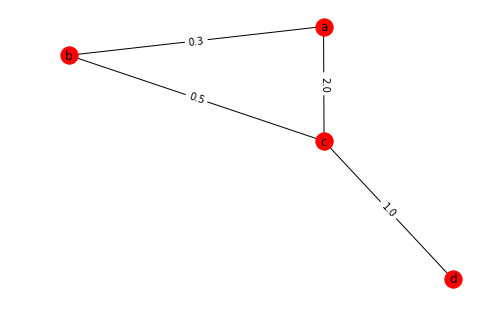

In [22]:
# Create a Weighted Graph 
W = nx.Graph()
W.add_edge('a', 'b', weight=0.3)
W.add_edge('b', 'c', weight=0.5)
W.add_edge('a', 'c', weight=2.0)
W.add_edge('c', 'd', weight=1.0)
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))

Most of the methods shown above can be applied to all types of graphs. For weighted graphs, the associated weight plays an important role in defining the shortest path. Let's see it through some methods shown below:

In [23]:
print ('Shortest path between nodes a and d with respect to hops:',nx.shortest_path(W, 'a', 'd'))
print ('Length of the shortest path:',nx.shortest_path_length(W, 'a', 'd'))
print ('Shortest path between nodes a and d with respect to edge weight:',nx.shortest_path(W, 'a', 'd',weight='weight'))
print ('Length of the shortest path:',nx.shortest_path_length(W, 'a', 'd',weight='weight'))

Shortest path between nodes a and d with respect to hops: ['a', 'c', 'd']
Length of the shortest path: 2
Shortest path between nodes a and d with respect to edge weight: ['a', 'b', 'c', 'd']
Length of the shortest path: 1.8


So we see although a path may have a less hops from source to destination, the weights associated with edges may help us decide a better path to allow , say , higher influence. 

## Additional Resources
- https://www.cse.ust.hk/~dekai/271/notes/L10/L10.pdf

## Summary 

In lesson we talked about calculating the shortest path between a given set of nodes for different types of graph structures that we have seen thus far. Shortest path calculation comes in handy during a number of analyses activities while processing graph. Paths based on weights , hops or directions can provide a deeper insight into identifying the strength of relationship and amount of influence between nodes in a network. In the following lab, we shall see a simple dataset and calculate as well as visualize paths with networkx. 